In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import statistics
from collections import Counter

sns.set_theme(style="darkgrid")

%matplotlib inline

In [2]:
pd.set_option('max_colwidth', None)

In [3]:
df = pd.read_csv(filepath_or_buffer = "C:/Users/ssettertobulte/Python/Masterstudium/ASUD_Cyberbullying/datframe_subtask1_2.csv")
df.head()

,tweet,binaereKlassifikation,granulareKlassifikation
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OFFENSE,INSULT
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",OFFENSE,ABUSE
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",OTHER,OTHER
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man damit sich selber so zu belügen, unverständlich",OFFENSE,ABUSE
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten zu müssen, deshalb sind die Führer treu und senden jeden Dreck, Lüge...",OFFENSE,ABUSE


In [4]:
df.iloc[:,1].value_counts()

OTHER      2061
OFFENSE     970
Name: binaereKlassifikation, dtype: int64

In [5]:
df.iloc[:,2].value_counts()

OTHER        2061
INSULT        459
ABUSE         400
PROFANITY     111
Name: granulareKlassifikation, dtype: int64

In [6]:
df.sample(50)

,tweet,binaereKlassifikation,granulareKlassifikation
2433,"@StephanieKlm8 Das war das Abartigste, was ich je von der Propaganda als \""""Krimi\""getarnt gesehen habe. |LBR| Einfach nur eine unverschämte Frechheit!",OTHER,OTHER
362,Warum fühlt sich das so an wie 2 Punkte verloren? #fcsp,OTHER,OTHER
1881,"@nprncbl @AuswaertigesAmt Die Siedlerterroristen hatten bereits vor der Ausrufung der Unabhängige ihrer Kolonie 200.000 Einheimische vertrieben oder massakriert, bevor die Nachbarn eingriffen. |LBR| Ich empfehle hierzu \""""Die Ethnische Säuberung Palästinas\""des israelischen Historikers Prof. Ilan Pappe.",OFFENSE,ABUSE
1472,"Der \""""Einzeltäter\""""... |LBR| nach dem Bruder Sami wird auch gefahndet. Welche Rolle hat Adel Chekkat?",OTHER,OTHER
1467,"An 3 verschiedenen Orten konnte Chekatt auf 14 Menschen schiessen, ohne gestoppt zu werden.Wie lange dauerte es,bis Opfer med Hilfe bekamen?",OTHER,OTHER
2308,"@che_notte @magna_est Identitäre und 3.Weg Leute sind durch das Hakenkreuz auf ihrer Stirn klar erkennbar. Chemnitz ist der Anfang, die Welle rollt.",OTHER,OTHER
2336,@Eddie_1412 @Swingtanz Der billige Stricher kann nur noch mit Lügen argumentieren.,OFFENSE,INSULT
1765,"Erst hat man tagelang über den Tsunami in Indonesien intensivst berichtet, jetzt scheint es nichts wichtigeres zu geben, als der starke Schneefall in der Alpenregion. Wird jetzt jedes Natur oder Wetterphänomen als Weltuntergang aufgebaut?",OTHER,OTHER
1441,"\""""Heißzeit\"""", angeblich Wort des Jahres 2018, lese und sehe ich heute zum 1. Mal.",OTHER,OTHER
222,"@over2019 @Sabine98036212 Kopfabschneider-Drohung ist schon übel, zumal ja mehr als genug Beispiele vorhanden sind, dass die das wirklich ernst meinen und ganz real tun!<U+0001F631>",OFFENSE,ABUSE


In [7]:
buffer_array = df.iloc[:,0].to_numpy()

In [12]:
linked_list = []
hashtag_list = []
tweet_list = []
utf_list = []
emoji_list = []
w_o_punctuation_list = []

emoji_list_default = [":D",":)",":(",":/","B)","8)","xD","XD","^^","._."
              ,":-D",":-)",":-(",":-/","B-)","8-)","x-D","X-D",":'-("]

stop_words = ["|LBR|"," ",""]



for i in buffer_array:
    help_array_linked = []
    help_array_hash = []
    help_array_utf = []
    help_array_emoji = []
    help_array_w_o_punctuaton = []
    
    word_list = i.split(" ")
    index_count = 0
    for i in word_list:
        if "@" in i:
            help_array_linked.append(i)
        if "#" in i:
            help_array_hash.append(i)
            word_list[index_count] = i.replace("#","")
        if "<U+" in i:
            buffer = i.split("<")
            i = buffer[0]
#             buffer[1]=utf
            word_list[index_count] = i
            for code in buffer[1:]:
                if code[0]!="<":
                    code = "<"+code
                help_array_utf.append(code)
        if i in emoji_list_default:
            help_array_emoji.append(i)
        if i in stop_words:
            word_list.remove(i)

        index_count = index_count+1
        
    for i in help_array_linked:
        word_list.remove(i)
    for i in help_array_emoji:
        word_list.remove(i)
    for i in word_list:
        buffer_word = i.translate(str.maketrans('', '', string.punctuation))
        help_array_w_o_punctuaton.append(buffer_word)
    

        
        
    linked_list.append(help_array_linked)
    hashtag_list.append(help_array_hash)
    tweet_list.append(word_list)
    utf_list.append(help_array_utf)
    emoji_list.append(help_array_emoji)
    w_o_punctuation_list.append(help_array_w_o_punctuaton)

df["Wörter in Tweet"] = tweet_list
df["Wörter pro Tweet"]="-"
df["Tweets ohne Satzzeichen"] = w_o_punctuation_list
df["Wortlänge"] = "-"
df["Durchschnittliche Wortlänge"] = "-"
df["Verlinkungen"]=linked_list
df["Verlinkung pro Tweet"] =  "-"
df["Hashtags"]=hashtag_list
df["Hashtags pro Tweet"] =  "-"
df["utf Codes"]=utf_list
df["utf Codes pro Tweet"] =  "-"
df["Emojis"] = emoji_list
df["Emojis pro Tweet"] =  "-"

In [46]:
for index, row in df.iterrows():
    word_list = row["Wörter in Tweet"]
    char_list = row["Tweets ohne Satzzeichen"]
    link_list = row["Verlinkungen"]
    hash_list = row["Hashtags"]
    utf_list  = row["utf Codes"]
    emoj_list = row["Emojis"]
    
    word_count = len(word_list)
    link_count = len(link_list)
    hash_count = len(hash_list)
    utf_count  = len(utf_list)
    emoj_count = len(emoj_list)
    
    char_array = []
    
    for i in char_list:
        char_array.append(len(i))
    avg_length = round(statistics.mean(char_array),2)
    
    df.loc[index,"Wörter pro Tweet"] = word_count
    df.loc[index,"Wortlänge"] = char_array
    df.loc[index,"Durchschnittliche Wortlänge"] = avg_length
    df.loc[index,"Verlinkung pro Tweet"] = link_count
    df.loc[index,"Hashtags pro Tweet"] = hash_count
    df.loc[index,"utf Codes pro Tweet"] = utf_count
    df.loc[index,"Emojis pro Tweet"] = emoj_count
    

In [70]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
df.sample(50)

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
936,"Wie es sich für eine 16-Jährige anfühlt, arm zu sein ,das schlimmste ist wenn man mit Mutti vor der #Tafel Suppenküche steht die Angst das andere Schüler einen dort sehen wenn man um Essen betteln muss.Weil die #SPD #Grünen #CDU #CSU den Regelsatz willkürlich klein Rechnen.",OTHER,OTHER,"[Wie, es, sich, für, eine, 16-Jährige, anfühlt,, arm, zu, sein, ,das, schlimmste, ist, wenn, man, mit, Mutti, vor, der, Tafel, Suppenküche, steht, die, Angst, das, andere, Schüler, einen, dort, sehen, wenn, man, um, Essen, betteln, muss.Weil, die, SPD, Grünen, CDU, CSU, den, Regelsatz, willkürlich, klein, Rechnen.]",46,"[Wie, es, sich, für, eine, 16Jährige, anfühlt, arm, zu, sein, das, schlimmste, ist, wenn, man, mit, Mutti, vor, der, Tafel, Suppenküche, steht, die, Angst, das, andere, Schüler, einen, dort, sehen, wenn, man, um, Essen, betteln, mussWeil, die, SPD, Grünen, CDU, CSU, den, Regelsatz, willkürlich, klein, Rechnen]","[3, 2, 4, 3, 4, 9, 7, 3, 2, 4, 3, 10, 3, 4, 3, 3, 5, 3, 3, 5, 11, 5, 3, 5, 3, 6, 7, 5, 4, 5, 4, 3, 2, 5, 7, 8, 3, 3, 6, 3, 3, 3, 9, 11, 5, 7]",4.76,[],0,"[#Tafel, #SPD, #Grünen, #CDU, #CSU]",5,[],0,[],0
2420,"@HeinrichHeine12 @OnymOnymO Der \""""innere\""Feind ist die größte Gefahr.",OTHER,OTHER,"[Der, \""""innere\""Feind, ist, die, größte, Gefahr.]",6,"[Der, innereFeind, ist, die, größte, Gefahr]","[3, 11, 3, 3, 6, 6]",5.33,"[@HeinrichHeine12, @OnymOnymO]",2,[],0,[],0,[],0
2766,@ProseccoPrinz Jap. Immer schon. War quasi die Einstiegsdroge für Alkohol und zuviel Zucker.,OTHER,OTHER,"[Jap., Immer, schon., War, quasi, die, Einstiegsdroge, für, Alkohol, und, zuviel, Zucker.]",12,"[Jap, Immer, schon, War, quasi, die, Einstiegsdroge, für, Alkohol, und, zuviel, Zucker]","[3, 5, 5, 3, 5, 3, 14, 3, 7, 3, 6, 6]",5.25,[@ProseccoPrinz],1,[],0,[],0,[],0
237,"@tomkoehler252 @safe_ID35 @nie_und_nimmer @Naund10 Sexistin mit Heliphobie, also puh das ist heftig!<U+0001F605>",OFFENSE,INSULT,"[Sexistin, mit, Heliphobie,, also, puh, das, ist, heftig!]",8,"[Sexistin, mit, Heliphobie, also, puh, das, ist, heftig]","[8, 3, 10, 4, 3, 3, 3, 6]",5,"[@tomkoehler252, @safe_ID35, @nie_und_nimmer, @Naund10]",4,[],0,[<U+0001F605>],1,[],0
2138,@OdiumNostrum google übersetzer bestes tool im kurs also sehr legitim,OTHER,OTHER,"[google, übersetzer, bestes, tool, im, kurs, also, sehr, legitim]",9,"[google, übersetzer, bestes, tool, im, kurs, also, sehr, legitim]","[6, 10, 6, 4, 2, 4, 4, 4, 7]",5.22,[@OdiumNostrum],1,[],0,[],0,[],0
1331,"Und da ihr vermutlich nicht kapiert, was daran so unglaublich gefährlich ist, muss ich es euch wohl erklären. |LBR| Ein inhaltsloses Symbol ist beliebig gebrauchbar, und damit auch ebenso beliebig missbrauchbar.",OTHER,OTHER,"[Und, da, ihr, vermutlich, nicht, kapiert,, was, daran, so, unglaublich, gefährlich, ist,, muss, ich, es, euch, wohl, erklären., Ein, inhaltsloses, Symbol, ist, beliebig, gebrauchbar,, und, damit, auch, ebenso, beliebig, missbrauchbar.]",30,"[Und, da, ihr, vermutlich, nicht, kapiert, was, daran, so, unglaublich, gefährlich, ist, muss, ich, es, euch, wohl, erklären, Ein, inhaltsloses, Symbol, ist, beliebig, gebrauchbar, und, damit, auch, ebenso, beliebig, missbrauchbar]","[3, 2, 3, 10, 5, 7, 3, 5, 2, 11, 10, 3, 4, 3, 2, 4, 4, 8, 3, 12, 6, 3, 8, 11, 3, 5, 4, 6, 8, 13]",5.7,[],0,[],0,[],0,[],0
1606,@huberchef @Guter_Goy Wie dumm kann man sein?,OFFENSE,INSULT,"[Wie, dumm, kann, man, sein?]",5,"[Wie, dumm, kann, man, sein]","[3, 4, 4, 3, 4]",3.6,"[@huberchef, @Guter_Goy]",2,[],0,[],0,[],0
2936,"Erfolgreiche Blockade von fragida, eben #nofragida in #Frankfurt. 60-80 Fans des Abendlandes bei 3000 dagegen. Gutes Verhältnis. weiter so.",OTHER,OTHER,"[Erfolgreiche, Blockade, von, fragida,, eben, nofragida, in, Frankfurt., 60-80, Fans, des, Abendla

In [48]:
df.describe()

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
count,3031,3031,3031,3031,3031,3031,3031,3031.0,3031,3031,3031,3031,3031,3031,3031,3031
unique,3031,2,4,3031,53,3031,3029,428.0,1187,18,496,9,260,13,11,4
top,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OTHER,OTHER,"[Komisch, das, die, Realitätsverweigerung, immer, von, linken, erbärmlichen, Correctiv, Accounts, ausgeht...]",9,"[Komisch, das, die, Realitätsverweigerung, immer, von, linken, erbärmlichen, Correctiv, Accounts, ausgeht]","[6, 2, 3, 5, 3, 4, 2, 3, 6, 3, 4, 3, 7, 11]",5.0,[],0,[],0,[],0,[],0
freq,1,2061,2061,1,144,1,2,81.0,1119,1119,2303,2303,2523,2523,2967,2967


In [49]:
df["binaereKlassifikation"].unique()

array(['OFFENSE', 'OTHER'], dtype=object)

In [50]:
df["granulareKlassifikation"].unique()

array(['INSULT', 'ABUSE', 'OTHER', 'PROFANITY'], dtype=object)

In [51]:
df[df["binaereKlassifikation"]=="OTHER"]["granulareKlassifikation"].unique()

array(['OTHER'], dtype=object)

In [52]:
OTHER_df = df[df["granulareKlassifikation"]=="OTHER"]
INSULT_df = df[df["granulareKlassifikation"]=="INSULT"]
ABUSE_df = df[df["granulareKlassifikation"]=="ABUSE"]
PROFANITY_df = df[df["granulareKlassifikation"]=="PROFANITY"]

In [58]:
print("Tweetlänge bei OTHER: " + str(round(OTHER_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei INSULT: " + str(round(INSULT_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei ABUSE: " + str(round(ABUSE_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei PROFANITY: " + str(round(PROFANITY_df["Wörter pro Tweet"].mean(),2)))

Tweetlänge bei OTHER: 19.06
Tweetlänge bei INSULT: 22.0
Tweetlänge bei ABUSE: 25.44
Tweetlänge bei PROFANITY: 20.97


In [59]:
print("Durchschnittliche Wortlänge bei OTHER: " + str(round(OTHER_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei INSULT: " + str(round(INSULT_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei ABUSE: " + str(round(ABUSE_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei PROFANITY: " + str(round(PROFANITY_df["Durchschnittliche Wortlänge"].mean(),2)))

Durchschnittliche Wortlänge bei OTHER: 5.34
Durchschnittliche Wortlänge bei INSULT: 5.51
Durchschnittliche Wortlänge bei ABUSE: 5.85
Durchschnittliche Wortlänge bei PROFANITY: 5.18


In [60]:
print("Durchschnittliche Anzahl Hashtags bei OTHER: " + str(round(OTHER_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei INSULT: " + str(round(INSULT_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei ABUSE: " + str(round(ABUSE_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei PROFANITY: " + str(round(PROFANITY_df["Hashtags pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Hashtags bei OTHER: 0.46
Durchschnittliche Anzahl Hashtags bei INSULT: 0.5
Durchschnittliche Anzahl Hashtags bei ABUSE: 0.51
Durchschnittliche Anzahl Hashtags bei PROFANITY: 0.47


In [61]:
print("Durchschnittliche Anzahl Verlinkung bei OTHER: " + str(round(OTHER_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei INSULT: " + str(round(INSULT_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei ABUSE: " + str(round(ABUSE_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei PROFANITY: " + str(round(PROFANITY_df["Verlinkung pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Verlinkung bei OTHER: 1.48
Durchschnittliche Anzahl Verlinkung bei INSULT: 1.93
Durchschnittliche Anzahl Verlinkung bei ABUSE: 1.72
Durchschnittliche Anzahl Verlinkung bei PROFANITY: 0.63


In [62]:
print("Durchschnittliche Anzahl Emojis bei OTHER: " + str(round(OTHER_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei INSULT: " + str(round(INSULT_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei ABUSE: " + str(round(ABUSE_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei PROFANITY: " + str(round(PROFANITY_df["Emojis pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Emojis bei OTHER: 0.03
Durchschnittliche Anzahl Emojis bei INSULT: 0.01
Durchschnittliche Anzahl Emojis bei ABUSE: 0.0
Durchschnittliche Anzahl Emojis bei PROFANITY: 0.05


In [63]:
print("Durchschnittliche Anzahl utf Codes bei OTHER: " + str(round(OTHER_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei INSULT: " + str(round(INSULT_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei ABUSE: " + str(round(ABUSE_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei PROFANITY: " + str(round(PROFANITY_df["utf Codes pro Tweet"].mean(),2)))

Durchschnittliche Anzahl utf Codes bei OTHER: 0.34
Durchschnittliche Anzahl utf Codes bei INSULT: 0.34
Durchschnittliche Anzahl utf Codes bei ABUSE: 0.56
Durchschnittliche Anzahl utf Codes bei PROFANITY: 0.27


In [28]:
df.sample(n = 50, random_state = 4711)

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
488,Schon alleine dass dieser @Sky Quatschkopf Lügen gestraft wird... #fcsp,OFFENSE,INSULT,"[Schon, alleine, dass, dieser, Quatschkopf, Lügen, gestraft, wird..., fcsp]",9,"[Schon, alleine, dass, dieser, Quatschkopf, Lügen, gestraft, wird, fcsp]","[5, 7, 4, 6, 11, 5, 8, 4, 4]",6,[@Sky],1,[#fcsp],1,[],0,[],0
341,".... und wenn jemand ein gutes (kostenloses) Tool zum Twitterlisten bearbeiten kennt, dann bitte ansagen. Das ist ja immer noch eine unterirdische Verwaltung , die Twitter da anbietet :-(",OTHER,OTHER,"[...., und, wenn, jemand, ein, gutes, (kostenloses), Tool, zum, Twitterlisten, bearbeiten, kennt,, dann, bitte, ansagen., Das, ist, ja, immer, noch, eine, unterirdische, Verwaltung, ,, die, Twitter, da, anbietet]",28,"[, und, wenn, jemand, ein, gutes, kostenloses, Tool, zum, Twitterlisten, bearbeiten, kennt, dann, bitte, ansagen, Das, ist, ja, immer, noch, eine, unterirdische, Verwaltung, , die, Twitter, da, anbietet]","[0, 3, 4, 6, 3, 5, 11, 4, 3, 13, 10, 5, 4, 5, 7, 3, 3, 2, 5, 4, 4, 13, 10, 0, 3, 7, 2, 8]",5.25,[],0,[],0,[],0,[:-(],1
2729,@Bea76190653 @Tapetenlama Ich habe jetzt dreimal Nacktpremiere gelesen und weiss jetzt auch nicht.,OTHER,OTHER,"[Ich, habe, jetzt, dreimal, Nacktpremiere, gelesen, und, weiss, jetzt, auch, nicht.]",11,"[Ich, habe, jetzt, dreimal, Nacktpremiere, gelesen, und, weiss, jetzt, auch, nicht]","[3, 4, 5, 7, 13, 7, 3, 5, 5, 4, 5]",5.545455,"[@Bea76190653, @Tapetenlama]",2,[],0,[],0,[],0
293,"erkel hat geschworen, \""""den Nutzen des Deutschen Volkes zu mehren\"""". |LBR| Und sie hält sich an ihren Schwur: als Melkkühe für EU und Merkelsiedler™ werden wir immer strammer herangezogen! |LBR| Man sollte die Eidesformel überarbeiten: \""""Nutzen FÜR das Deutsche Volk mehren\""statt \""""DES\""""!<U+0001F914>",OFFENSE,ABUSE,"[erkel, hat, geschworen,, \""""den, Nutzen, des, Deutschen, Volkes, zu, mehren\""""., Und, sie, hält, sich, an, ihren, Schwur:, als, Melkkühe, für, EU, und, Merkelsiedler™, werden, wir, immer, strammer, herangezogen!, Man, sollte, die, Eidesformel, überarbeiten:, \""""Nutzen, FÜR, das, Deutsche, Volk, mehren\""statt, \""""DES\""""!]",40,"[erkel, hat, geschworen, den, Nutzen, des, Deutschen, Volkes, zu, mehren, Und, sie, hält, sich, an, ihren, Schwur, als, Melkkühe, für, EU, und, Merkelsiedler™, werden, wir, immer, strammer, herangezogen, Man, sollte, die, Eidesformel, überarbeiten, Nutzen, FÜR, das, Deutsche, Volk, mehrenstatt, DES]","[5, 3, 10, 3, 6, 3, 9, 6, 2, 6, 3, 3, 4, 4, 2, 5, 6, 3, 8, 3, 2, 3, 14, 6, 3, 5, 8, 12, 3, 6, 3, 11, 12, 6, 3, 3, 8, 4, 11, 3]",5.5,[],0,[],0,[<U+0001F914>],1,[],0
1459,"Shira und Amihai sind die Eltern des verstorbenen Babys. Beide Terroropfer verletzt. Mama Shira noch im Koma, atmet aber wieder selbständig.",OTHER,OTHER,"[Shira, und, Amihai, sind, die, Eltern, des, verstorbenen, Babys., Beide, Terroropfer, verletzt., Mama, Shira, noch, im, Koma,, atmet, aber, wieder, selbständig.]",21,"[Shira, und, Amihai, sind, die, Eltern, des, verstorbenen, Babys, Beide, Terroropfer, verletzt, Mama, Shira, noch, im, Koma, atmet, aber, wieder, selbständig]","[5, 3, 6, 4, 3, 6, 3, 12, 5, 5, 11, 8, 4, 5, 4, 2, 4, 5, 4, 6, 11]",5.52381,[],0,[],0,[],0,[],0
1269,"Was sich die Leute immer für einen Unsinn ausdenken, nur um nicht vernünftig (d.h. Kommunisten) sein zu müssen ist schon absurd und irgendwie auch drollig.",OFFENSE,INSULT,"[Was, sich, die, Leute, immer, für, einen, Unsinn, ausdenken,, nur, um, nicht, vernünftig, (d.h., Kommunisten), sein, zu, müssen, ist, schon, absurd, und, irgendwie, auch, drollig.]",25,"[Was, sich, die, Leute, immer, für, einen, Unsinn, ausdenken, nur, um, nicht, vernünftig, dh, Kommunisten, sein, zu, müssen, ist, schon, absurd, und, irgendwie, auch, drollig]","[3, 4, 3, 5, 5, 

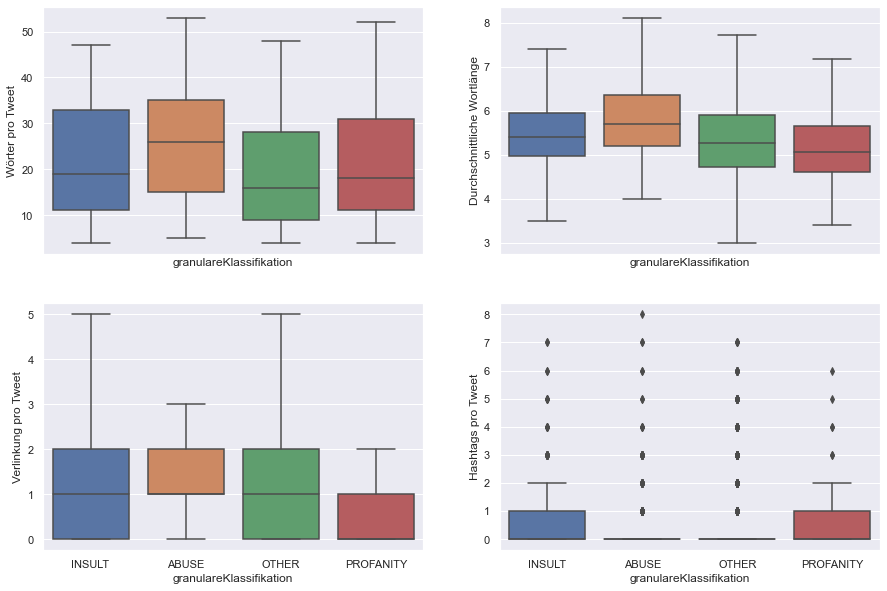

In [64]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex = True
                        )

ax0 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Wörter pro Tweet"
                  ,showfliers = False
                  ,ax = axes[0,0]
                 )

ax1 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Durchschnittliche Wortlänge"
                  ,showfliers = False
                  ,ax = axes[0,1]
                 )

ax2 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Verlinkung pro Tweet"
                  ,showfliers = False
                  ,ax = axes[1,0]
                 )

ax3 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Hashtags pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[1,1]
                 )

# ax4 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "utf Codes pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,0]
#                  )

# ax5 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Emojis pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,1]
#                  )

TypeError: No loop matching the specified signature and casting was found for ufunc add

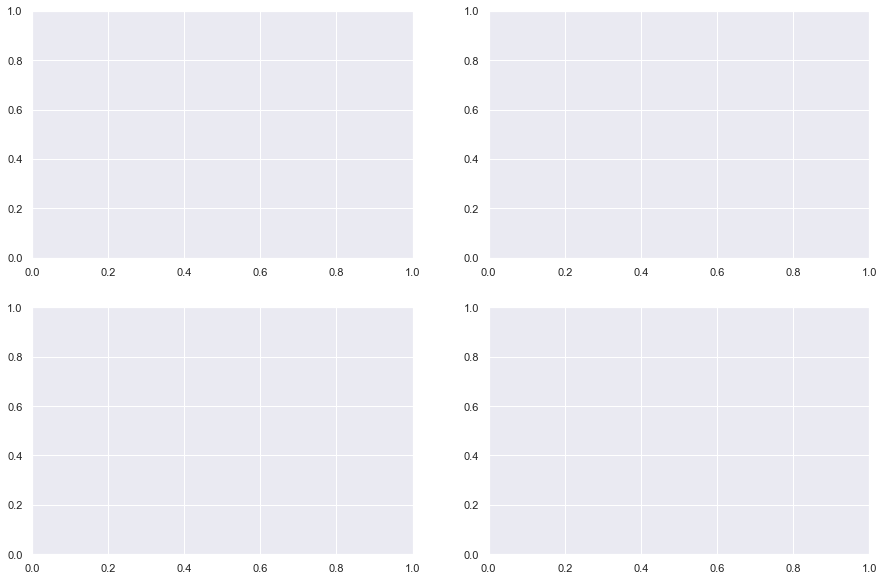

In [69]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
#                          ,sharex = True
                        )

ax0 = sns.violinplot(data = df
                      ,x = "granulareKlassifikation"
                      ,y = "Wörter pro Tweet"
    #                   ,showfliers = False
                      ,ax = axes[0,0]
                     )

ax1 = sns.violinplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Durchschnittliche Wortlänge"
#                   ,showfliers = False
                  ,ax = axes[0,1]
                 )

ax2 = sns.violinplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Verlinkung pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[1,0]
                 )

ax3 = sns.violinplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Hashtags pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[1,1]
                 )

# ax4 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "utf Codes pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,0]
#                  )

# ax5 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Emojis pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,1]
#                  )

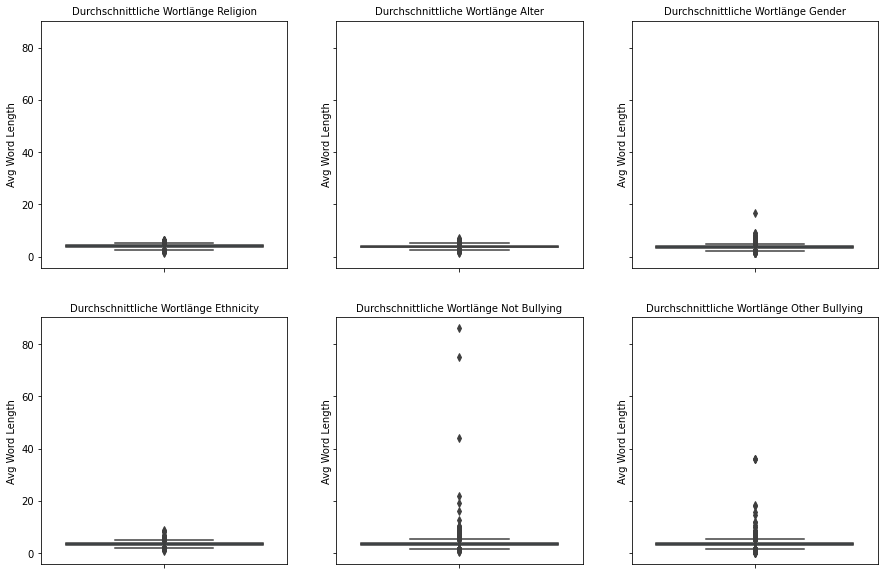

In [125]:

ax1 = sns.boxplot(data = religion_df
                   , y   = "Avg Word Length"
                   , ax  = axes[0,0])

ax1.set_title("Durchschnittliche Wortlänge Religion",fontsize = 10)
ax1.set(ylabel = "Avg Word Length")

ax2 = sns.boxplot(data = age_df
                   , y   = "Avg Word Length"
                   , ax  = axes[0,1])

ax2.set_title("Durchschnittliche Wortlänge Alter",fontsize = 10)
ax2.set(ylabel = "Avg Word Length")

ax3 = sns.boxplot(data = gender_df
                   , y   = "Avg Word Length"
                   , ax  = axes[0,2])

ax3.set_title("Durchschnittliche Wortlänge Gender",fontsize = 10)
ax3.set(ylabel = "Avg Word Length")

ax4 = sns.boxplot(data = ethnicity_df
                   , y   = "Avg Word Length"
                   , ax  = axes[1,0])

ax4.set_title("Durchschnittliche Wortlänge Ethnicity",fontsize = 10)
ax4.set(ylabel = "Avg Word Length")

ax5 = sns.boxplot(data = not_cyberbullying_df
                   , y   = "Avg Word Length"
                   , ax  = axes[1,1])

ax5.set_title("Durchschnittliche Wortlänge Not Bullying",fontsize = 10)
ax5.set(ylabel = "Avg Word Length")

ax6 = sns.boxplot(data = other_cyberbullying_df
                   , y   = "Avg Word Length"
                   , ax  = axes[1,2])

ax6.set_title("Durchschnittliche Wortlänge Other Bullying",fontsize = 10)
ax6.set(ylabel = "Avg Word Length")

plt.show()

In [126]:
df[df["Avg Word Length"]>=20]

,tweet_text,cyberbullying_type,Message w/o punctuation,Word list,Word Length,Avg Word Length
3237,なぁなぁパンツちょーだいパンツ。パンツくれよ！パンツくれよォ！パンツくれよお前！パンツくらい...,not_cyberbullying,なぁなぁパンツちょーだいパンツ。パンツくれよ！パンツくれよォ！パンツくれよお前！パンツくらい...,[なぁなぁパンツちょーだいパンツ。パンツくれよ！パンツくれよォ！パンツくれよお前！パンツくら...,[75],75
5294,#HealthcareIsForYouAndMeNotForFuckingIndustry,not_cyberbullying,HealthcareIsForYouAndMeNotForFuckingIndustry,"[, HealthcareIsForYouAndMeNotForFuckingIndustry]","[0, 44]",22
6145,ラストのパンツ… ラスパン発見！ラスパンじっくり見よ。ワーオｗｗｗ （BULLY・13）,not_cyberbullying,ラストのパンツ… ラスパン発見！ラスパンじっくり見よ。ワーオｗｗｗ （BULLY・13）,[ラストのパンツ… ラスパン発見！ラスパンじっくり見よ。ワーオｗｗｗ （BULLY・13）],[44],44
7304,【自動post】BULLY（いじめ）とSUICIDE（自殺）で、BULLYCIDE（いじめ自...,not_cyberbullying,【自動post】BULLY（いじめ）とSUICIDE（自殺）で、BULLYCIDE（いじめ自...,[【自動post】BULLY（いじめ）とSUICIDE（自殺）で、BULLYCIDE（いじめ...,[86],86
24541,ââââ»âââââ»âââ,other_cyberbullying,ââââ»âââââ»âââ,[ââââ»âââââ»âââ],[36],36
25953,â±âââââââââââ²,other_cyberbullying,â±âââââââââââ²,[â±âââââââââââ²],[36],36
26197,ððððððððð,other_cyberbullying,ððððððððð,[ððððððððð],[36],36
